<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_PREDICT_OTHERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [36]:
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap

import feature_subsets
import xgboost



In [38]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 205)


In [39]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(432, 202)


In [40]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 195)


In [42]:
random.seed(1234)
np.random.seed(1234)
train_split,eval_split=split_train_eval_by_mut_pos(neil1_comp[~neil1_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 17, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 20, 57.0: 15, 58.0: 33}


## Train NEIL1, predict TTYH2

In [43]:
test_split=ttyh2_comp

In [44]:

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [45]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [46]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [47]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

mut_ref_struct:I
mut_next_struct:H
u2_length_stem
mut_exist
site_prev_nt:C
site_prev_struct:S
d2_5prm_cp_bulge:U:A
site_length_stem
d3_length_hairpin
d2_length_internal_es
u2_exist
u1_5prm_cp_bulge
u1_length_bulge
d3_3prm_cp_bulge
mut_prev_struct:M
u1_3prm_cp_bulge
u1_5prm_cp_internal
site_5prm_cp_internal:A:U
d3_length_internal_es
d3_length_internal_ecs
site_5prm_cp_hairpin:G:C
site_5prm_cp_hairpin:U:A
mut_type:mismatch
site_5prm_cp_hairpin
u1_length_internal_es
d3_5prm_cp_bulge
u3_3prm_cp_internal
site_5prm_cp_bulge:C:G
u2_length_hairpin
u2_length_bulge
d2_exist
site_next_nt:C
u2_5prm_cp_internal:U:A
u1_length_internal_ecs
site_struct:S
site_1_1:A:G
mut_struct:H
d1_length_hairpin
d2_length_hairpin
d1_length_internal_ecs
u3_length_bulge
d1_struct:S
u3_length_stem
d1_length_internal_es
d2_3prm_cp_internal:G:U
u3_length
d2_length_internal_ecs
mut_ref_struct:B
mut_ref_nt:U
u2_3prm_cp_internal:G:U
u1_5prm_cp_hairpin
d3_struct:S
mut_type:indel
d1_3prm_cp_bulge
site_1_1:A:U
mut_type:wt
d1_5

In [48]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [49]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [50]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(322, 99)
(322,)
(72, 99)
(72,)
(601, 204)
(601,)


In [51]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [52]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['mut_prev_struct:B', 'd2_3prm_cp_bulge:C:G', 'd3_length', 'mut_prev_struct:I', 'u_count', 'u2_length', 'u2_3prm_cp_bulge:C:G', 'site_3prm_cp_internal:G:U', 'u2_5prm_cp_bulge:G:C', 'd2_3prm_cp_internal:U:A', 'u_all_stem_length', 'mut_next_struct:I', 'site_next_nt:A', 'ensemble_free_energy', 'u2_distance', 'mut_ref_nt:G', 'mut_nt:C', 'mut_ref_nt:A', 'probability_active_conf', 'site_5prm_cp_internal:C:G', 'site_prev_nt:U', 'd2_3prm_cp_internal:C:G', 'd2_5prm_cp_internal:G:C', 'u3_exist', 'u2_3prm_cp_bulge:G:C', 'num_mutations', 'site_prev_nt:A', 'u2_struct:I', 'd2_5prm_cp_internal:C:G', 'u3_distance', 'site_struct:B', 'mut_struct:B', 'mut_struct:S', 'mut_pos', 'u2_5prm_cp_bulge:C:G', 'u2_5prm_cp_internal:C:G', 'sim_nor_score', 'mfe_frequency', 'mut_struct:I', 'minimum_free_energy', 'd2_5prm_cp_internal:A:U', 'u2_3prm_cp_internal:G:C', 'mut_prev_struct:H', 'mut_next_struct:S', 'site_3prm_cp_bulge:G:C', 'mut_next_struct:B', 'site_length_internal_es', 'mut_site_dist', 'd2_5prm_cp_bulge:G:C'

In [53]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [54]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [20]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [59]:
num_round = 1000
random.seed(1234)
np.random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.48900	eval-auc:0.74322	eval-mae:0.20075	eval-map:1.00000	eval-rmse:0.22981	train-aucpr:0.58051	train-auc:0.81974	train-mae:0.20483	train-map:1.00000	train-rmse:0.24095
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.51552	eval-auc:0.75059	eval-mae:0.15935	eval-map:1.00000	eval-rmse:0.18231	train-aucpr:0.59082	train-auc:0.82452	train-mae:0.15032	train-map:1.00000	train-rmse:0.17669
[2]	eval-aucpr:0.54099	eval-auc:0.77299	eval-mae:0.12378	eval-map:1.00000	eval-rmse:0.14854	train-aucpr:0.59659	train-auc:0.82947	train-mae:0.11094	train-map:1.00000	train-rmse:0.13107
[3]	eval-aucpr:0.53648	eval-auc:0.77366	eval-mae:0.10553	eval-map:1.00000	eval-rmse:0.13126	train-aucpr:0.59962	train-auc:0.83356	train-mae:0.08381	train-map:1.00000	train-rmse:0.09969
[4]	eval-aucpr:0.53869	eval-auc:0.77502	eval-mae:0.09133	eval-map:1.00000	eval-rmse:0.12090	train-aucpr:0.60101	tra

[44]	eval-aucpr:0.54938	eval-auc:0.78772	eval-mae:0.06078	eval-map:1.00000	eval-rmse:0.10699	train-aucpr:0.60906	train-auc:0.84219	train-mae:0.00404	train-map:1.00000	train-rmse:0.00597
[45]	eval-aucpr:0.54929	eval-auc:0.78729	eval-mae:0.06064	eval-map:1.00000	eval-rmse:0.10679	train-aucpr:0.60907	train-auc:0.84220	train-mae:0.00386	train-map:1.00000	train-rmse:0.00569
[46]	eval-aucpr:0.54983	eval-auc:0.78729	eval-mae:0.06048	eval-map:1.00000	eval-rmse:0.10679	train-aucpr:0.60911	train-auc:0.84221	train-mae:0.00357	train-map:1.00000	train-rmse:0.00520
[47]	eval-aucpr:0.54983	eval-auc:0.78729	eval-mae:0.06039	eval-map:1.00000	eval-rmse:0.10676	train-aucpr:0.60915	train-auc:0.84223	train-mae:0.00329	train-map:1.00000	train-rmse:0.00478
[48]	eval-aucpr:0.54983	eval-auc:0.78729	eval-mae:0.06039	eval-map:1.00000	eval-rmse:0.10685	train-aucpr:0.60915	train-auc:0.84223	train-mae:0.00322	train-map:1.00000	train-rmse:0.00473
[49]	eval-aucpr:0.55035	eval-auc:0.78736	eval-mae:0.06034	eval-map:1.0

In [60]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [61]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9989670848568445, pvalue=0.0)
	Pearson corr : (0.9999864276065377, 0.0)
	MAE : 0.000888781294015643
	MAPE : 0.008832463165418754
	RMSE : 0.0012755645139062974
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.8977448271868658, pvalue=1.2605351914464357e-26)
	Pearson corr : (0.8922190214976603, 7.224532111645768e-26)
	MAE : 0.05974602507220375
	MAPE : 0.28132610945575454
	RMSE : 0.10654908257581941
	auPRC : 0.951425032363662
	auROC : 0.9531746031746031
Test
	Spearman corr : SpearmanrResult(correlation=0.38432129923343106, pvalue=1.3686428182398728e-22)
	Pearson corr : (0.3611579457783648, 5.910335964963815e-20)
	MAE : 0.22666900485089536
	MAPE : 5.287911039051439
	RMSE : 0.26206067585388887
	auPRC : 0.6021394775348401
	auROC : 0.7238466196231864


In [62]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9989670848568445, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.8977448271868658, pvalue=1.2605351914464357e-26)
Test:SpearmanrResult(correlation=0.38432129923343106, pvalue=1.3686428182398728e-22)


Pearson correlation:
Train:(0.9999864276065377, 0.0)
Eval:(0.8922190214976603, 7.224532111645768e-26)
Test:(0.3611579457783648, 5.910335964963815e-20)


In [63]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.000888781294015643
MAE Eval:0.05974602507220375
MAE Test:0.22666900485089536


In [64]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:0.8832463165418754%
MAPE Eval:28.132610945575454%
MAPE Test:528.7911039051439%


In [65]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0012755645139062974
RMSE Eval:0.10654908257581941
RMSE Test:0.26206067585388887


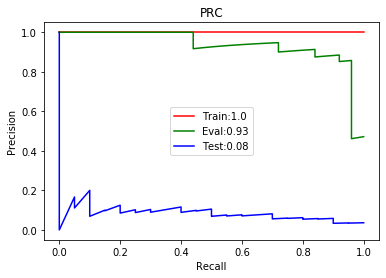

In [66]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

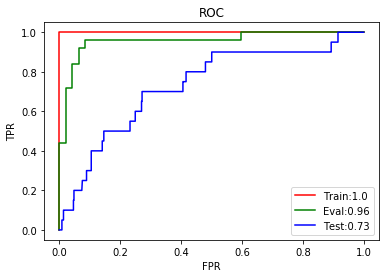

In [67]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

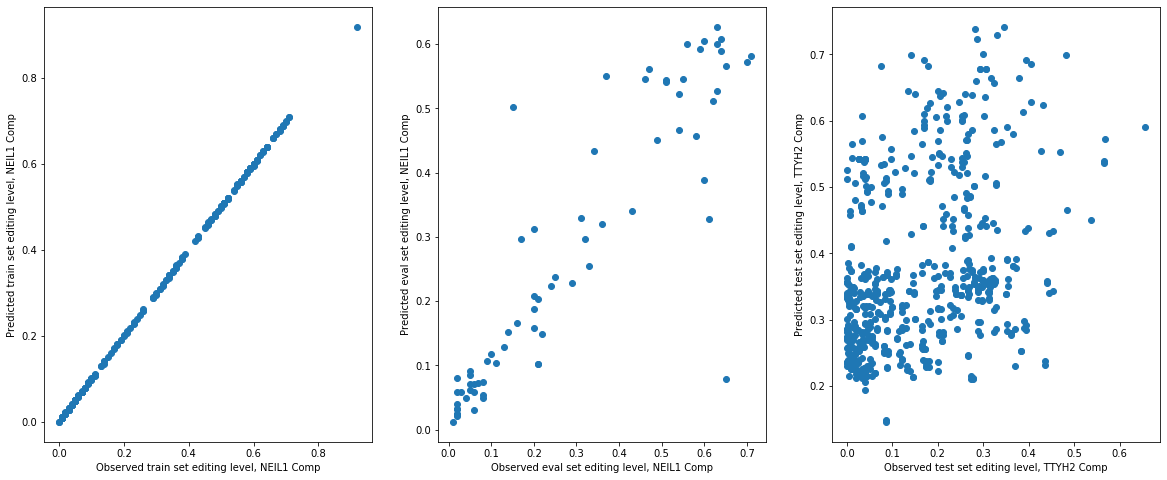

In [68]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, NEIL1 Comp")
plt.ylabel("Predicted train set editing level, NEIL1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, NEIL1 Comp")
plt.ylabel("Predicted eval set editing level, NEIL1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, TTYH2 Comp")
plt.ylabel("Predicted test set editing level, TTYH2 Comp")
plt.show()

In [69]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred
print(np.mean(test_y))
y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.15661647254575706
0.3743803
38.846172675501734
41.27415449522718
The R-square of the test data is  -0.063 



## Train NEIL1, predict AJUBA

In [70]:
test_split=ajuba_comp

In [71]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [72]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [73]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [74]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

site_5prm_cp_hairpin
u3_5prm_cp_hairpin
d2_length_bulge
u1_distance
d2_5prm_cp_hairpin
u1_length_internal_es
u3_exist
d3_length_bulge
d1_length_internal_es
d1_3prm_cp_internal
d3_5prm_cp_bulge
d3_5prm_cp_internal
d3_exist
u2_length_stem
d1_distance
d1_5prm_cp_hairpin
u2_5prm_cp_hairpin
d1_length_bulge
u2_length_hairpin
u1_5prm_cp_hairpin
d3_3prm_cp_internal
d3_struct:S
site_length_stem
d1_3prm_cp_bulge
d3_length_hairpin
d1_exist
u3_length_internal_es
u3_length_internal_ecs
u2_exist
d2_exist
d2_length_stem
u1_exist
site_next_struct:S
u1_length_bulge
u1_length_internal_ecs
d1_5prm_cp_bulge
site_length_bulge
d3_5prm_cp_hairpin
d1_5prm_cp_internal
u3_length_hairpin
site_length_hairpin
u1_length_hairpin
d1_length_hairpin
d3_3prm_cp_bulge
d2_length_hairpin
d1_length_internal_ecs
d3_length_internal_es
u3_length_bulge
d3_length_internal_ecs
d1_struct:S
u2_length_bulge


In [75]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [76]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [77]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(322, 98)
(322,)
(72, 98)
(72,)
(482, 143)
(482,)


In [78]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [79]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['mut_prev_struct:B', 'd2_3prm_cp_bulge:C:G', 'd3_length', 'mut_prev_struct:I', 'u_count', 'u2_length', 'u2_3prm_cp_bulge:C:G', 'u2_5prm_cp_bulge:G:C', 'd2_3prm_cp_internal:U:A', 'u_all_stem_length', 'site_3prm_cp_bulge:A:U', 'mut_next_struct:I', 'site_next_nt:A', 'ensemble_free_energy', 'u2_distance', 'd2_5prm_cp_internal:U:A', 'mut_ref_nt:G', 'mut_nt:C', 'mut_ref_nt:A', 'probability_active_conf', 'site_5prm_cp_internal:C:G', 'site_prev_nt:U', 'd2_3prm_cp_internal:C:G', 'site_3prm_cp_internal:A:U', 'd2_5prm_cp_internal:G:C', 'u2_3prm_cp_bulge:G:C', 'num_mutations', 'site_prev_nt:A', 'u2_struct:I', 'u3_distance', 'site_struct:B', 'mut_struct:B', 'mut_struct:S', 'mut_pos', 'u2_5prm_cp_bulge:C:G', 'u2_5prm_cp_internal:C:G', 'sim_nor_score', 'mfe_frequency', 'mut_struct:I', 'minimum_free_energy', 'site_5prm_cp_bulge:A:U', 'd2_5prm_cp_internal:A:U', 'u2_3prm_cp_internal:G:C', 'mut_prev_struct:H', 'mut_next_struct:S', 'site_3prm_cp_bulge:G:C', 'mut_next_struct:B', 'site_length_internal_es',

In [80]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [81]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [82]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [84]:
num_round = 1000
random.seed(1234)
np.random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.48900	eval-auc:0.74322	eval-mae:0.20075	eval-map:1.00000	eval-rmse:0.22981	train-aucpr:0.58051	train-auc:0.81974	train-mae:0.20483	train-map:1.00000	train-rmse:0.24095
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.51552	eval-auc:0.75059	eval-mae:0.15935	eval-map:1.00000	eval-rmse:0.18231	train-aucpr:0.59082	train-auc:0.82452	train-mae:0.15032	train-map:1.00000	train-rmse:0.17669
[2]	eval-aucpr:0.53601	eval-auc:0.75766	eval-mae:0.12556	eval-map:1.00000	eval-rmse:0.14997	train-aucpr:0.59560	train-auc:0.82692	train-mae:0.11158	train-map:1.00000	train-rmse:0.13166
[3]	eval-aucpr:0.53691	eval-auc:0.76313	eval-mae:0.10933	eval-map:1.00000	eval-rmse:0.13537	train-aucpr:0.59902	train-auc:0.83297	train-mae:0.08454	train-map:1.00000	train-rmse:0.10017
[4]	eval-aucpr:0.54104	eval-auc:0.77108	eval-mae:0.09446	eval-map:1.00000	eval-rmse:0.12418	train-aucpr:0.59960	tra

[44]	eval-aucpr:0.55708	eval-auc:0.78547	eval-mae:0.06076	eval-map:1.00000	eval-rmse:0.10377	train-aucpr:0.60916	train-auc:0.84223	train-mae:0.00343	train-map:1.00000	train-rmse:0.00502
[45]	eval-aucpr:0.55708	eval-auc:0.78547	eval-mae:0.06071	eval-map:1.00000	eval-rmse:0.10372	train-aucpr:0.60916	train-auc:0.84223	train-mae:0.00335	train-map:1.00000	train-rmse:0.00493
[46]	eval-aucpr:0.55744	eval-auc:0.78556	eval-mae:0.06068	eval-map:1.00000	eval-rmse:0.10371	train-aucpr:0.60916	train-auc:0.84223	train-mae:0.00327	train-map:1.00000	train-rmse:0.00482
[47]	eval-aucpr:0.55801	eval-auc:0.78599	eval-mae:0.06079	eval-map:1.00000	eval-rmse:0.10369	train-aucpr:0.60917	train-auc:0.84224	train-mae:0.00303	train-map:1.00000	train-rmse:0.00444
[48]	eval-aucpr:0.55822	eval-auc:0.78605	eval-mae:0.06076	eval-map:1.00000	eval-rmse:0.10368	train-aucpr:0.60918	train-auc:0.84224	train-mae:0.00289	train-map:1.00000	train-rmse:0.00424
[49]	eval-aucpr:0.55823	eval-auc:0.78608	eval-mae:0.06078	eval-map:1.0

In [85]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [86]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9989670848568445, pvalue=0.0)
	Pearson corr : (0.9999796842200408, 0.0)
	MAE : 0.0010844176581674637
	MAPE : 0.01357300415807729
	RMSE : 0.0015602273420391038
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.8806525897097691, pvalue=2.091999493108696e-24)
	Pearson corr : (0.8970309935349038, 1.588229648576035e-26)
	MAE : 0.060343024377814594
	MAPE : 0.3745535077655046
	RMSE : 0.10351483460677093
	auPRC : 0.9848760128975396
	auROC : 0.9506172839506173
Test
	Spearman corr : SpearmanrResult(correlation=0.45277148518739113, pvalue=9.76413236129179e-26)
	Pearson corr : (0.6424039812695364, 1.9118392670040327e-57)
	MAE : 0.30970469598239925
	MAPE : 11.841625007531908
	RMSE : 0.3178032510429805
	auPRC : 0.5982760978091698
	auROC : 0.8890007898894154


In [87]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9989670848568445, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.8806525897097691, pvalue=2.091999493108696e-24)
Test:SpearmanrResult(correlation=0.45277148518739113, pvalue=9.76413236129179e-26)


Pearson correlation:
Train:(0.9999796842200408, 0.0)
Eval:(0.8970309935349038, 1.588229648576035e-26)
Test:(0.6424039812695364, 1.9118392670040327e-57)


In [88]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0010844176581674637
MAE Eval:0.060343024377814594
MAE Test:0.30970469598239925


In [89]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.357300415807729%
MAPE Eval:37.45535077655046%
MAPE Test:1184.162500753191%


In [90]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0015602273420391038
RMSE Eval:0.10351483460677093
RMSE Test:0.3178032510429805


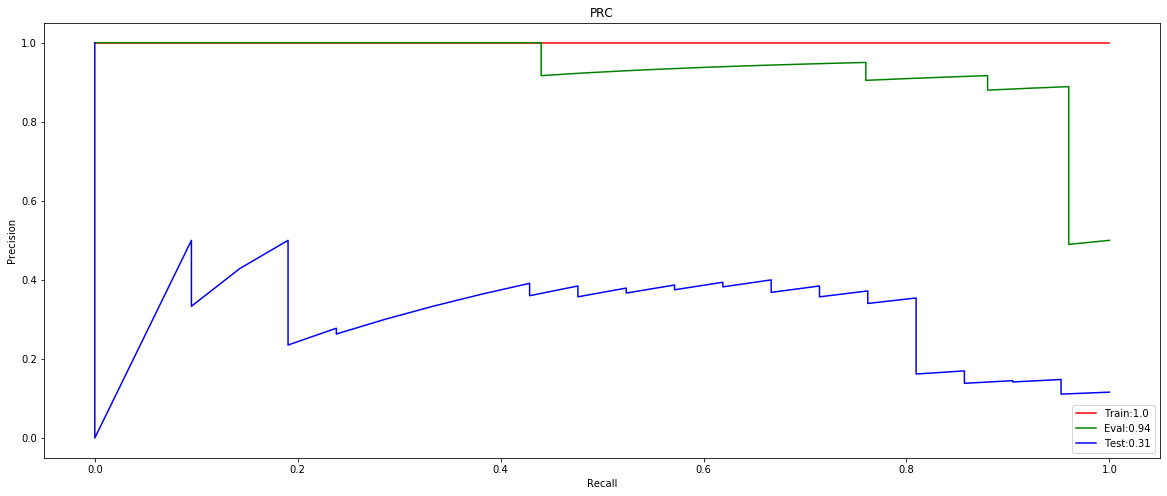

In [91]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

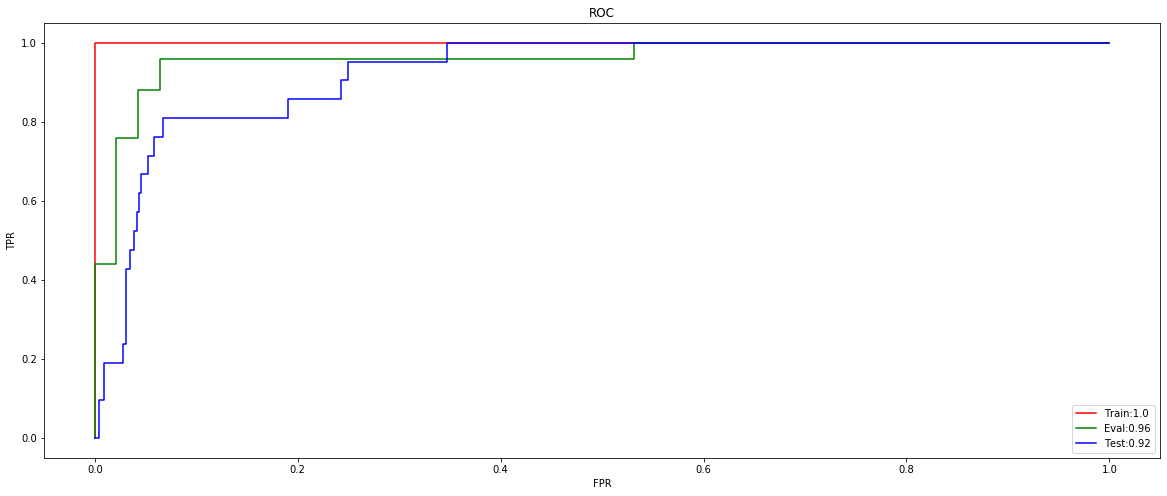

In [92]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.2,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

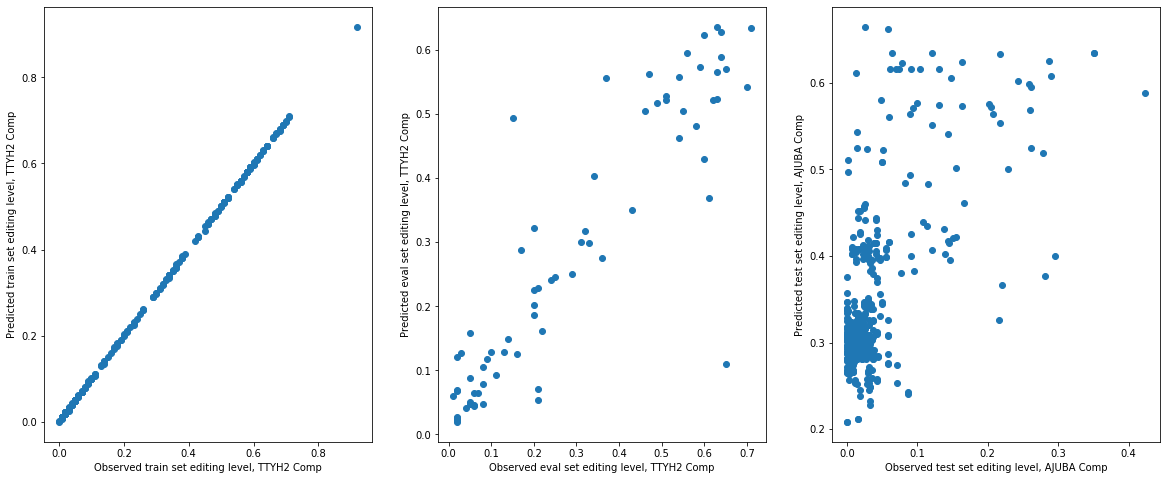

In [93]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()

In [94]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.34811655
47.86371635390685
48.68147287202108
The R-square of the test data is  -0.017 

